# 1 - Perkenalan

Megatheo Justino FTDS Batch 11 Phase 2

Dataset : Telco Customer Churn

Dataset terkait info dari costumer sebuah provider yang berisikan informasi dari akun, demograpic, dan services yang dipakai costumer. Dataset juga berisi informasi costumer yang meninggalkan / tidak menggunakan provider tersebut lagi.

- customerID: Unique ID of each customer
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharge: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Customers who left within the last month 

## Objective
- Membuat Model Artificial Neural Network
- Menganilisis Layer
- Mencari Insight dari analisis data

# 2 - Import Libraries

In [1]:
# Import Libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.compose import make_column_transformer


import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

import pickle

# 3 - Data Loading

In [2]:
# Load Data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data memiliki 7043 baris dengan 21 column, dimana column bertipe object kecuali SeniorCitizen, tenure, dan MonthlyCharges. Data juga tidak ada mengindikasikan missing value.

In [4]:
# Check Info 2 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Pada kolom SeniorCitizen memiliki nilai min 0 dan 1, seperti pada dokumentasi dataset ternya kolom tersebut merupakan kolom categorial
- Kolom tenure merupakan lamanya customer memakai jasa provider tersebut, terlihat rata-rata costumer memakai provider selama 32 bulan, terdapat customer yang nilai nya 0 bulan dalam memakai jasa provider dan terlama yaitu 72 bulan.
- Kolom MonthlyCharges merupakan tagihan bulanan costumer dimana tidak terdifinisi dalam curency apa. Mari kita asumsikan Dollar. Terlihat rata-rata tagihan bulan costumer adalah 64$ dengan tagihan terendah 18$ dan tertinggi 118$.

In [5]:
# Check Unique Value Categorial Column
cat_col = df.select_dtypes(include=['object']).columns.to_list()
for col in df[cat_col]:
    print(f'{col} : {df[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


Kita tidak akan memakai kolom CustomerID terlihat unique values yang banyak yang fungsinya kemungkinan sama dengan index. Lalu Untuk kolom TotalCharges kita akan mengganti tipe datanya menjadi numeric terlihat dari maksud kolom tersebut dan unique values yang banyak. Kolom SeniorCitizen juga akan kita rubah menjadi data categoric karena ketika kita lihat nilai kolum tersebut diatas kolum memiliki niali 0 dan 1 .

In [6]:
# Change Data Numeric to Categoric
df['SeniorCitizen'] = df['SeniorCitizen'].apply(str)
senior_map = {'0': 'No', '1': 'Yes'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(senior_map)

# Change Data Categoric to Numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop Columns
df.drop(['customerID'], axis=1, inplace=True)

Mari kita cek lagi apakah terdapat missing values di feature

In [7]:
for col in df.columns:
    print(f'{col} : {df[col].isnull().sum()}')

gender : 0
SeniorCitizen : 0
Partner : 0
Dependents : 0
tenure : 0
PhoneService : 0
MultipleLines : 0
InternetService : 0
OnlineSecurity : 0
OnlineBackup : 0
DeviceProtection : 0
TechSupport : 0
StreamingTV : 0
StreamingMovies : 0
Contract : 0
PaperlessBilling : 0
PaymentMethod : 0
MonthlyCharges : 0
TotalCharges : 11
Churn : 0


Terdapat 11 missing values pada feature TotalCharges. Untuk menhandle missing values mari kita cari tau alasan kenapa terjadi missing, mungkin hal ini disebabkan karena memang mereka tidak memakai provider tersebut. Ingat nilai dari feature tenure bahwa terdapat costumer yang memakai provider tersebut 0 bulan maka mari kita coba cek feauture tenure yang nilai 0 apakah ada 11 juga.

In [8]:
# Check tenure value 0 
df[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Terlihat jumlah baris yang tenure featurenya bernilai 0 ada sebanyak 11 baris lalu ketika kita melihat feature TotalCharges dari baris tersebut semuanya bernilai NaN. Untuk itu mari kita isi nilai Nan tersebut dengan nilai 0 karena mereka bisa diasumsikan costumer yang tidak berlangganan.

In [9]:
# Change Nan to 0
df.replace(np.nan, 0, inplace=True)

# 4 - EDA

## Churn

Mari kita lihat bagaimana kolum target kita

No     5174
Yes    1869
Name: Churn, dtype: int64


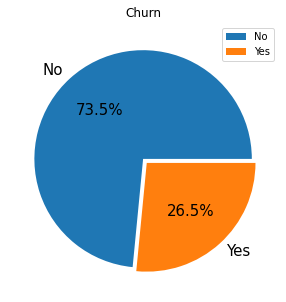

In [10]:
# Filter Data
churn = df['Churn'].value_counts()
print(churn)

# Plot Data
plt.figure(figsize=(10,5))
plt.pie(churn, labels=churn.index, autopct='%1.1f%%',textprops = {"fontsize":15}, explode = [0,0.05])
plt.title('Churn')
plt.legend()
plt.show()

Terlihat data yang imbalance pada kolom target kita dimana costumer yang tidak menggunakan provider tersebut lebih sedikit dibanding costumer yang masih bertahan, untuk yang bertahan sebanyak 73,5% dan yang tidak menggunakan lagi ada 26,5%.

## Univariate analysis: numerical data

	Summary for TENURE
Skewness of tenure	: 0.2395397495619829
Mean tenure :	 32.37114865824223
Median tenure :	 29.0 

	Summary for MONTHLYCHARGES
Skewness of MonthlyCharges	: -0.22052443394398033
Mean MonthlyCharges :	 64.76169246059922
Median MonthlyCharges :	 70.35 

	Summary for TOTALCHARGES
Skewness of TotalCharges	: 0.963234654832277
Mean TotalCharges :	 2279.734303563826
Median TotalCharges :	 1394.55 



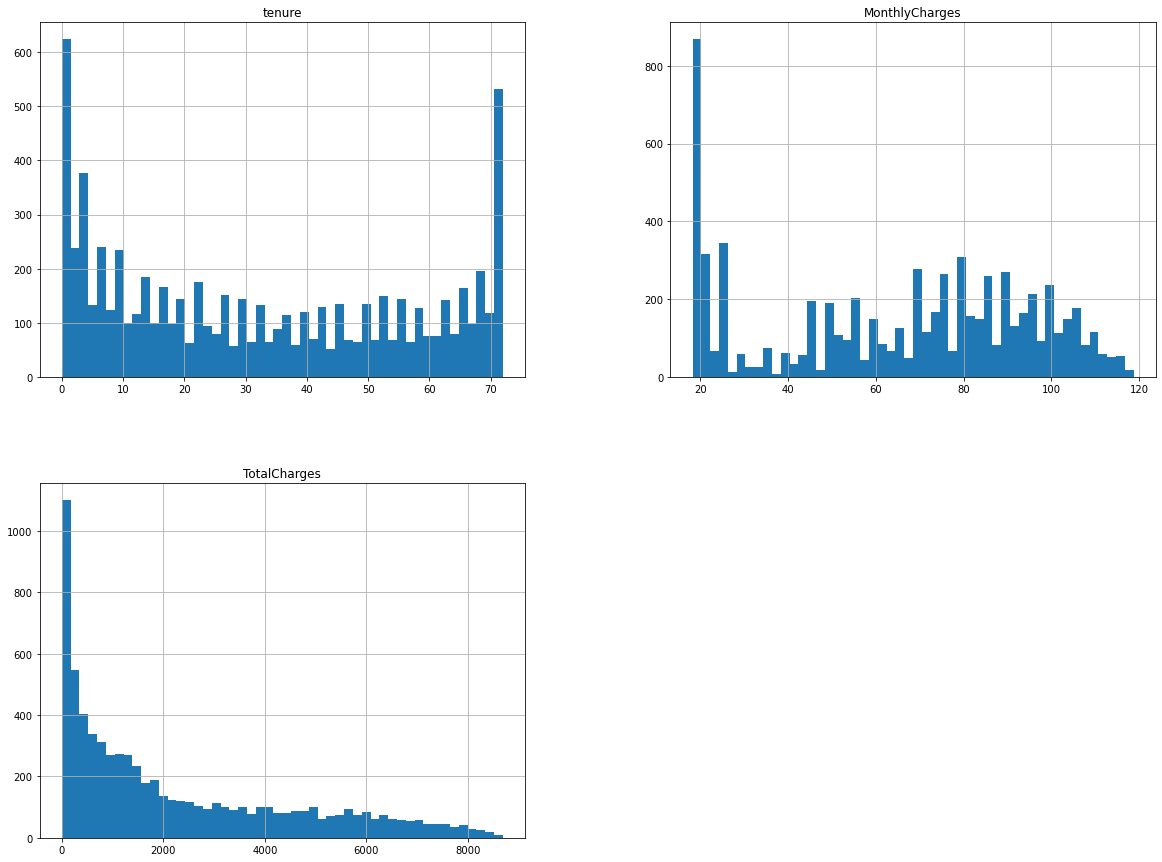

In [11]:
# Create statistics summaries with skew, mean, and median
# Produce a dataframe with just numerical columns
df_num = ['tenure','MonthlyCharges','TotalCharges']

for col in df_num:

    skew = df[col].skew()
    mean = df[col].mean()
    median = df[col].median()
    
    print(f'\tSummary for {col.upper()}')
    print(f'Skewness of {col}\t: {skew}')
    print(f'Mean {col} :\t {mean}')
    print(f'Median {col} :\t {median} \n')

# Plot Data
df[df_num].hist(bins=50, figsize=(20,15))
plt.show()

Kolom tenure dan MonthlyCharges berdistribusi normal, sedangkan TotalCharges Right Skew. 

## Univariate analysis: categorical data

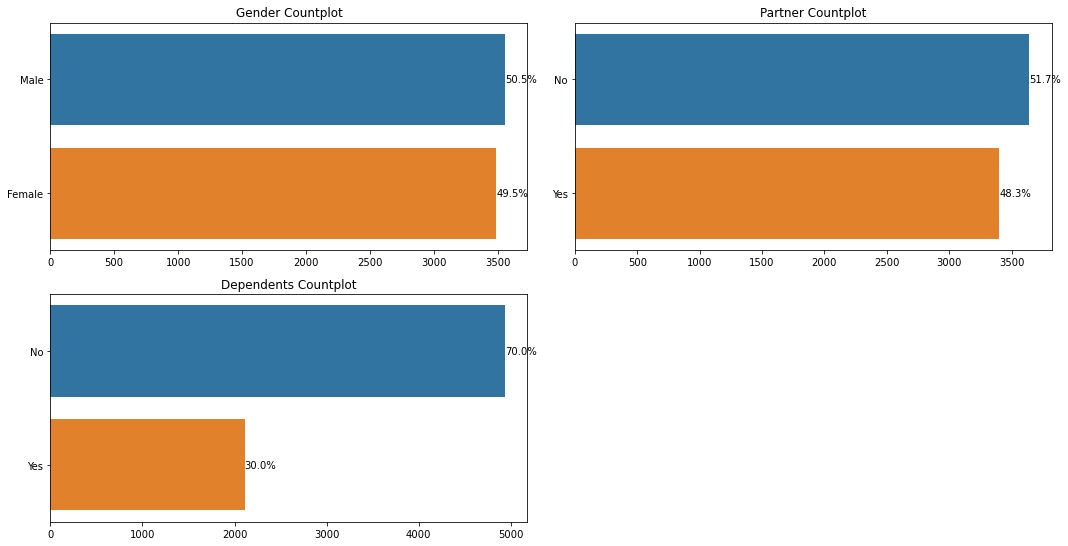

In [12]:
# Set the plot number for the first subplot function
plot_number = 1

# Set sizes for all plots
plt.figure(figsize=(15, 15)) # create a figure object
plt.subplots_adjust(hspace = 0.5) # set the size of subplots

for col in df[['gender', 'Partner', 'Dependents']]:
    
    # Call countplot on each column
    plt.subplot(4, 2, plot_number)
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().index
    )
    plt.title(f'{col.capitalize()} Countplot')
    plt.xlabel('')
    plt.ylabel('')

    plot_number = plot_number + 1 # set a new plot number for the next subplot function
    
    # Add relative frequency labels:
    n_points = df.shape[0]
    col_counts = df[col].value_counts()
    locs, labels = plt.yticks()   # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = col_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation at the top of the bar
        plt.text(x=count, y=loc, s=pct_string, ha='left', va='center', color='k')
    
plt.tight_layout()

Tidak Banyak Perbedaan dalam jumlah Gender antar laki-laki dengan perempuan dimana laki-laki hanya sedikit lebih tinggi dibandingkan perempuan jumlahnya. Begitu juga dengan status mereka ,memang masih lebih banyak costumer yang single meskipun berbeda sedikit dengan yang non-single. Mayoritas costumer juga belum memiliki tanggungan .

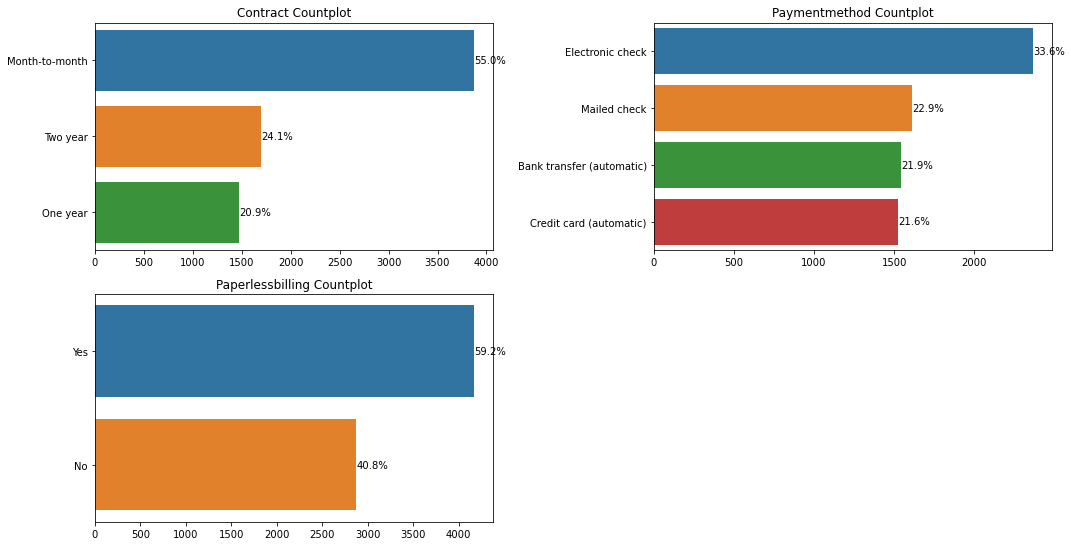

In [13]:
# Set the plot number for the first subplot function
plot_number = 1

# Set sizes for all plots
plt.figure(figsize=(15, 15)) # create a figure object
plt.subplots_adjust(hspace = 0.5) # set the size of subplots

for col in df[['Contract' ,'PaymentMethod' ,'PaperlessBilling']]:
    
    # Call countplot on each column
    plt.subplot(4, 2, plot_number)
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().index
    )
    plt.title(f'{col.capitalize()} Countplot')
    plt.xlabel('')
    plt.ylabel('')

    plot_number = plot_number + 1 # set a new plot number for the next subplot function
    
    # Add relative frequency labels:
    n_points = df.shape[0]
    col_counts = df[col].value_counts()
    locs, labels = plt.yticks()   # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = col_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation at the top of the bar
        plt.text(x=count, y=loc, s=pct_string, ha='left', va='center', color='k')
    
plt.tight_layout()

Costumer banyak yang memilih bulanan dalam berlangganan provider ini. Sesuai dengan zaman juga pembayatan lewat elctronik juga merupakan metode pembayaran yang paling banyak digunakan costumer. Costumer juga banyak memiliki paperlessbilling .

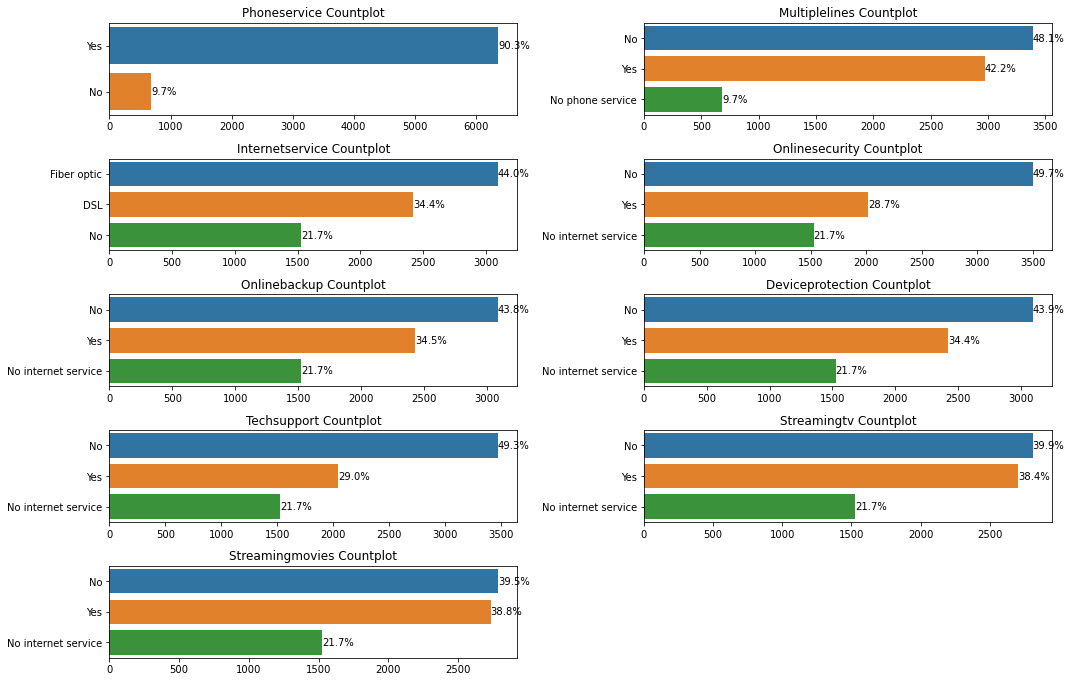

In [14]:
# Set the plot number for the first subplot function
plot_number = 1

# Set sizes for all plots
plt.figure(figsize=(15, 15)) # create a figure object
plt.subplots_adjust(hspace = 0.5) # set the size of subplots

for col in df[['PhoneService', 'MultipleLines', 'InternetService', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']]:
    
    # Call countplot on each column
    plt.subplot(8, 2, plot_number)
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().index
    )
    plt.title(f'{col.capitalize()} Countplot')
    plt.xlabel('')
    plt.ylabel('')

    plot_number = plot_number + 1 # set a new plot number for the next subplot function
    
    # Add relative frequency labels:
    n_points = df.shape[0]
    col_counts = df[col].value_counts()
    locs, labels = plt.yticks()   # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = col_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation at the top of the bar
        plt.text(x=count, y=loc, s=pct_string, ha='left', va='center', color='k')
    
plt.tight_layout()

Cukup unik terdapat 9% pelanggan yang tidak mengambil layanan telepon, diantara 90% costumer yang mengambil layanan telepon terdapat 42% orang yang mengambil layanan multiplelines. Terdapat 21% costumer yang tidak mengambil layanan internet, dan sekitar 78% costumer yang mengambil layanan internet hanya 28% costumer yang memakai security dalam berinternet, mungkin maasih lemahnya kesadaran costumer betapa berbahayanya internet. Terlihat memang jika kita lihat dari semua layanan yang ada masih banyak costumer yang memilih untuk tidak mengambil layanan tertentu. Hal ini mungkin bisa menjadi bahan pertimbangan untuk menarik minat konsumen namun bisa juga memang hal ini merupakan strategi penawaran banyak layanan sesuai kebutuhan consumer.

## Bivariate analysis: Churn vs other variables

### Numerical

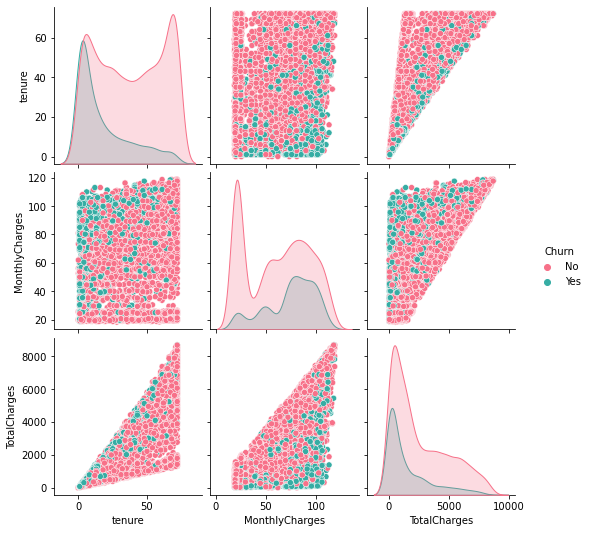

In [15]:
sns.pairplot(df, hue='Churn', palette='husl')

Memang sedikit agak tidak terlihat namun jika dilihat lebih mendetail costumer yang bertahan cenderung mempunyai lama penggunaan yang sedikit dibanding costumer yang sudah tidak memakai provider tersebut.

### Acount Information 

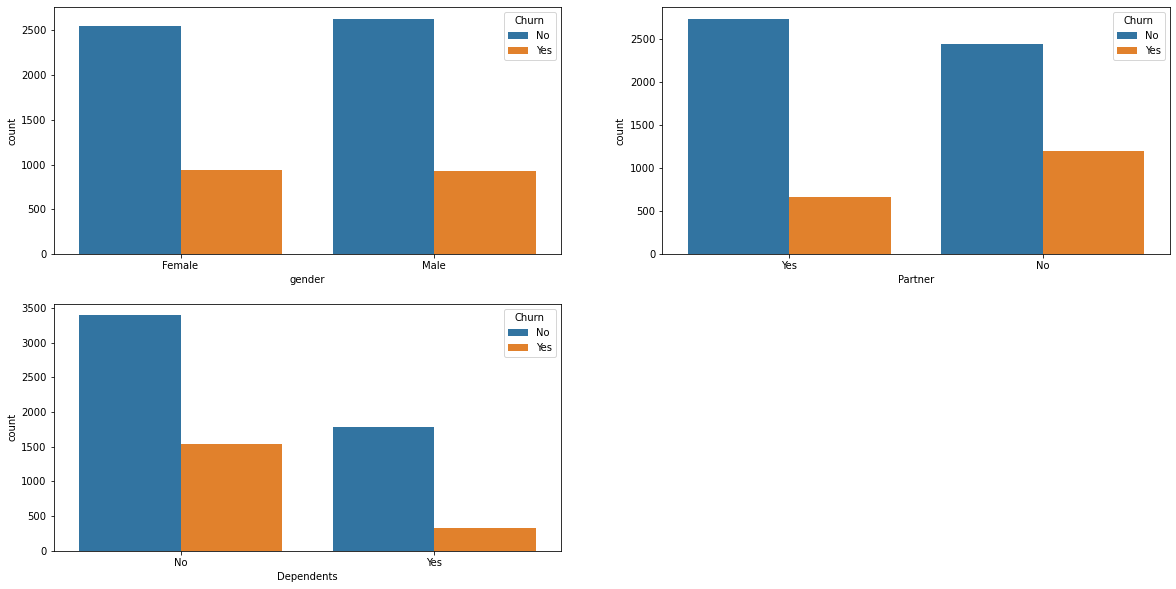

In [16]:
# Plot Data
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.countplot(data=df, x='gender' ,hue='Churn')

plt.subplot(2,2,2)
sns.countplot(data=df, x='Partner' ,hue='Churn')

plt.subplot(2,2,3)
sns.countplot(data=df, x='Dependents' ,hue='Churn')
plt.show()

Terlihat jumlah pria dan wanita yang masih memakai provider ini sama, costumer yang non-single banyak yang berhenti berlangganan. Mungkinkah disebabkan oleh tangungan meraka ? . Setelah kita lihat ternyata costumer yang banyak berhenti berlangganan adalah costumer yang tidak memiliki tanggungan.

### Demographic Information

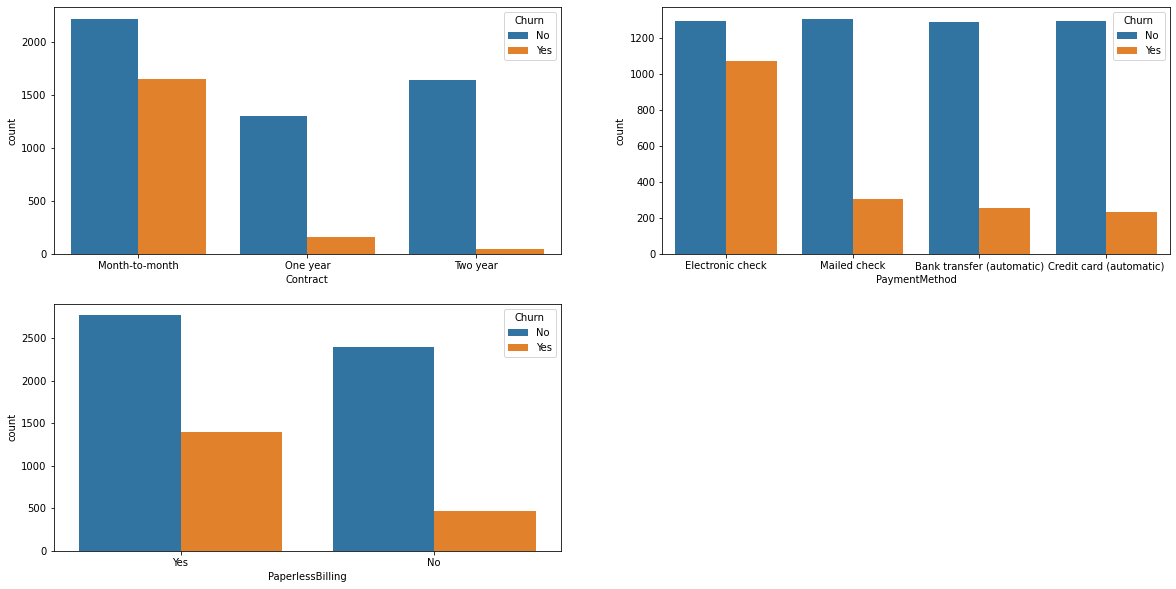

In [17]:
# Plot Data
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.countplot(data=df, x='Contract' ,hue='Churn')

plt.subplot(2,2,2)
sns.countplot(data=df, x='PaymentMethod' ,hue='Churn')

plt.subplot(2,2,3)
sns.countplot(data=df, x='PaperlessBilling' ,hue='Churn')
plt.show()

Dalam hal contract cukup menarik bahwa banyak costumer yang memilih tidak berlangganan lagi padahal mereka sudah berlangganan tahunan .

### Services

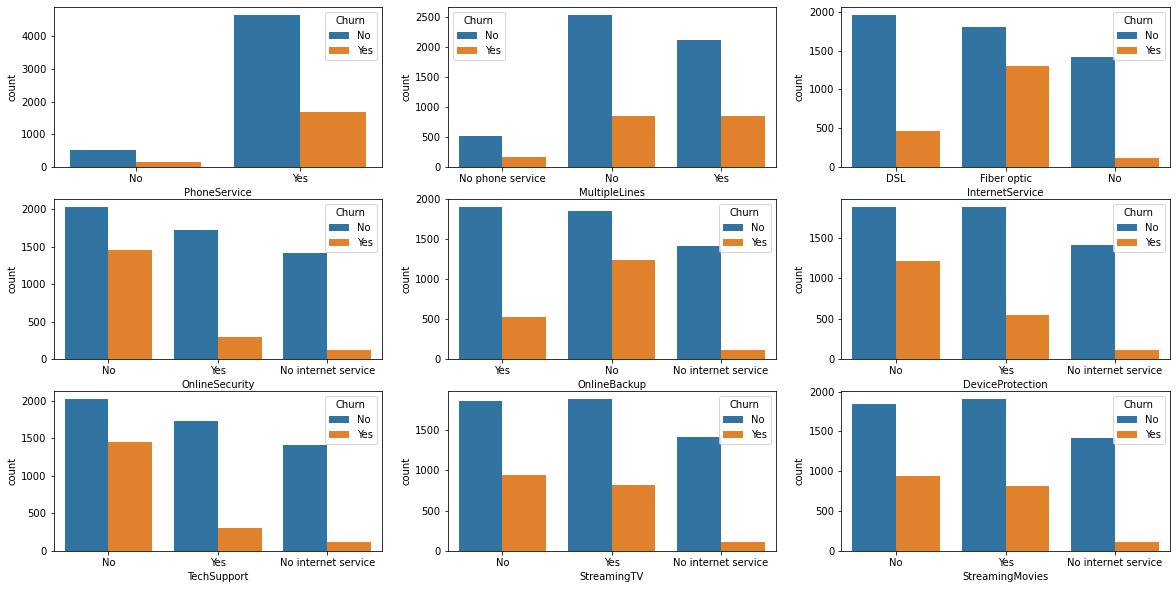

In [18]:
# Plot Data
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.countplot(data=df, x='PhoneService' ,hue='Churn')

plt.subplot(3,3,2)
sns.countplot(data=df, x='MultipleLines' ,hue='Churn')

plt.subplot(3,3,3)
sns.countplot(data=df, x='InternetService' ,hue='Churn')

plt.subplot(3,3,4)
sns.countplot(data=df, x='OnlineSecurity' ,hue='Churn')

plt.subplot(3,3,5)
sns.countplot(data=df, x='OnlineBackup' ,hue='Churn')

plt.subplot(3,3,6)
sns.countplot(data=df, x='DeviceProtection' ,hue='Churn')

plt.subplot(3,3,7)
sns.countplot(data=df, x='TechSupport' ,hue='Churn')

plt.subplot(3,3,8)
sns.countplot(data=df, x='StreamingTV' ,hue='Churn')

plt.subplot(3,3,9)
sns.countplot(data=df, x='StreamingMovies' ,hue='Churn')
plt.show()

# 5 - Data Preprocessing

Pertama kita akan lakukan splitting pada dataset kita untuk mengambil data untuk inference, train, validation, dan test

## Split Data

### Data Inference

In [19]:
# Take sample of data from df
df_inf = df.sample(3, random_state=1)

# Drop df_inf from df
df.drop(df_inf.index, inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

### Data Feature and Target

In [20]:
# Split Data for Feature and Target
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Split Data for train, validation, and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)

## Outliers

In [21]:
# Input Paramater Distribution  Check
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] > 0.5:
        skew_dist.append(dist_check.index[i])
    else:
        normal_dist.append(dist_check.index[i])

# Outliers Detection Function
# for Normally Distributed Data

def detect_normal(df, parameter):
    
    threshold = 3
    mean_ = np.mean(df[parameter])
    std_ = np.std(df[parameter])

    upper_count = df[
                    ((df[parameter]-mean_)/std_) > threshold
                    ][parameter].count()

    bottom_count = df[
                    ((df[parameter]-mean_)/std_) < -threshold
                    ][parameter].count()

    total_count = upper_count + bottom_count

    percentage = (total_count/len(df[parameter])*100).round(2)

    a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)
    
# Outliers Detection Function
# for Skew Distributed Data

def detect_skew(df, parameter, fold=1.5):
    
    for i in parameter:
        
        IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
        upper = df[parameter].quantile(0.75) + (fold*IQR)
        bottom = df[parameter].quantile(0.25) - (fold*IQR)

        upper_count = df[
            (df[parameter] > upper)
        ][parameter].count()

        bottom_count = df[
            (df[parameter] < bottom)
        ][parameter].count()
        
        total_count = upper_count + bottom_count

        percentage = (total_count/len(df[parameter])*100).round(2)

        a = ({'Parameter':parameter, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [22]:
# Skew dist
print('skew_dist :', skew_dist)
print("__________"*20)
# normal_dist
print('normal_dist :',normal_dist)
print("__________"*20)

skew_dist : ['TotalCharges']
________________________________________________________________________________________________________________________________________________________________________________________________________
normal_dist : ['tenure', 'MonthlyCharges']
________________________________________________________________________________________________________________________________________________________________________________________________________


In [23]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dist:
    detect_skew(X_train, parameter=i)

{'Parameter': 'TotalCharges', 'Total Outliers': 0, 'Percentage': 0.0}


In [24]:
for i in skew_dist:
    detect_normal(X_train, parameter=i)

{'Parameter': 'TotalCharges', 'Total Outliers': 0, 'Percentage': 0.0}


Kita tidak menemukan outliers

## Scaling & Encoding

Sebelum itu berikut adalah list feature kita ,
- Numerical Feature : tenure, MontlyCharges, TotalCharges
- Categorial Feature :gender, Partner, Dependents, PhoneService, PaperlessBilling, SeniorCitizen,
   MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies, Contract, PaymentMethod

Kita akan melakukan scaling dan encoding menggunakan Standarscaler untuk numerical karena data numerical mayoritas berdistribusi normal dan tidak ada outliers lalu untuk categorical kita menggunakan onehot encoder karena data tidak ada yuang ordinal.

In [25]:
# Filter the feature
num_std = X_train.select_dtypes(include=np.number).columns.tolist()
cat_ohe = X_train.select_dtypes(include=['object']).columns.tolist()

# Make Column Tranform
scaler_encode = make_column_transformer(
    (StandardScaler(),num_std),
    (OneHotEncoder(), cat_ohe)
)

scaler_encode.fit(X_train)
X_train_final = scaler_encode.transform(X_train)
X_valid_final = scaler_encode.transform(X_valid)
X_test_final = scaler_encode.transform(X_test)

X_train_final = pd.DataFrame(data=X_train_final, columns=scaler_encode.get_feature_names_out())
X_valid_final = pd.DataFrame(data=X_valid_final, columns=scaler_encode.get_feature_names_out())
X_test_final = pd.DataFrame(data=X_test_final, columns=scaler_encode.get_feature_names_out())

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_valid = le.transform(y_valid)
y_test = le.transform(y_test)

## Feature Selection

Dalam memilih Feature, kita menggunakan feature importance dari model random forest untuk melihat feature yang tidak kita perlukan.

In [26]:
RF = RandomForestClassifier(random_state=2, n_jobs=-1, verbose=1)
RF.fit(X_train_final,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(n_jobs=-1, random_state=2, verbose=1)

In [27]:
fi = RF.__getattribute__('feature_importances_')
column=scaler_encode.get_feature_names_out()
fi = pd.DataFrame(fi)
fi.set_index(column, inplace=True)

In [28]:
fi

,0
standardscaler__tenure,0.130899
standardscaler__MonthlyCharges,0.136446
standardscaler__TotalCharges,0.154104
onehotencoder__gender_Female,0.018632
onehotencoder__gender_Male,0.020232
onehotencoder__SeniorCitizen_No,0.012588
onehotencoder__SeniorCitizen_Yes,0.013125
onehotencoder__Partner_No,0.014598
onehotencoder__Partner_Yes,0.014784
onehotencoder__Dependents_No,0.011903


Terlihat hasil dari semua feature diatas kita akan drop feature yang dibawah 0.01. Karena sebelumnya kita sudah melakukan one hot encoding, jika salahsatu colomn memiliki nilai dibawah 0.01 maka colom yang berkaitan dengan feature tersebut akan kita drop semua.

In [29]:
drop_features = ['onehotencoder__PhoneService_No','onehotencoder__PhoneService_Yes','onehotencoder__MultipleLines_No',
                'onehotencoder__MultipleLines_No phone service','onehotencoder__MultipleLines_Yes','onehotencoder__InternetService_DSL',
                'onehotencoder__InternetService_DSL','onehotencoder__InternetService_Fiber optic','onehotencoder__InternetService_No',
                'onehotencoder__DeviceProtection_No','onehotencoder__DeviceProtection_No internet service','onehotencoder__DeviceProtection_Yes',
                'onehotencoder__StreamingTV_No','onehotencoder__StreamingTV_No internet service','onehotencoder__StreamingTV_Yes',
                'onehotencoder__StreamingMovies_No','onehotencoder__StreamingMovies_No internet service','onehotencoder__StreamingMovies_Yes',
                'onehotencoder__TechSupport_No','onehotencoder__TechSupport_No internet service','onehotencoder__TechSupport_Yes',
                'onehotencoder__OnlineBackup_No','onehotencoder__OnlineBackup_No internet service','onehotencoder__OnlineBackup_Yes',
                'onehotencoder__OnlineSecurity_No','onehotencoder__OnlineSecurity_No internet service','onehotencoder__OnlineSecurity_Yes']
 

Setelah diseleksi kita mendapatkan sekitar 27 kolom yang akan kita drop dimana jika kita kembali ke feature sebelum di encoding feature yang tidak terpakai diantarnya adalah:

PhoneService, MultipleLines, InternetService, Device Protection, StreamingTV, Streaming Movies, TechSupport, OnlineBackup, dan OnlineScurity

In [30]:
#Drop the features
X_train_final.drop(drop_features, axis=1, inplace=True)
X_valid_final.drop(drop_features, axis=1, inplace=True)
X_test_final.drop(drop_features, axis=1, inplace=True)

## Input Pipeline

Kita akan melakukan input pipeline untuk mempermudah dan mempercepat kita dalam melakukan training model

In [31]:
AUTOTUNE = tf.data.AUTOTUNE

In [32]:
# Build Pipeline from data in memory
train_batch = tf.data.Dataset.from_tensor_slices((X_train_final, y_train)).shuffle(X_train_final.shape[0]).batch(32)
valid_batch = tf.data.Dataset.from_tensor_slices((X_valid_final, y_valid)).shuffle(X_valid_final.shape[0]).batch(32)


train_batch = train_batch.cache().prefetch(buffer_size=AUTOTUNE)
valid_batch = valid_batch.cache().prefetch(buffer_size=AUTOTUNE)

Kita memakai pipeline untuk load data dari memory dan kita tranfromasi datanya dengan shuffle data dengan buffersize sebanyak shape dari datanya dan memakai batch dengan batszienya 32

# 6 - Model Definition

In [33]:
keras.backend.clear_session()

In [34]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=[20,],kernel_initializer=keras.initializers.HeNormal(seed=123),activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])


NB : proses arcitecture model sudah di arrange berualang kali dan menemukan bahwa architecture ini yang mungkin paling baik

Model architecture diatas dibuat dengan sequential API dimana terdapa :

- 1 input layer dengan neuron 32, lalu mendefinisikan weight initializtionnya yaitu HeNormal , kita mengambil referensi dari dalam kode id bahwa setiap inilization pada umumnya punya pasangan activation functionnya oleh karena itu kita menggunakan relu dimana activation ini berpasang dengan He.

- 2 hidden layer dengan masing-masing neuron yaitu 16 dan 8 dan juga tetap menggunakan activation functionya relu

- 1 output layer dengan neuron 1 dimana kasus kita adalah menangani binary classification, dan untuk menangani itu kita memakan activation sigmoid.

Pada Compiling model kita akan set optimizer, loss dan metricnya, dimana:

- optimizer kita menggunakan adam karena dia optimizer yang bagus untuk menghasilkan convergen quality dan dia tidak terlalu banyak membutuhkan banyak tunning terhadap learning ratenya.
- loss nya kita memakai BinaryCrossentropy karena kita menangani binary clasification 
- dan untuk matricnya kita pakai accuracy

In [35]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


# 7 - Model Training

Lalu kita mentraining model kita dengan bantuan input pipiline dan parameter epoch di set ke 100

In [36]:
history = model1.fit(train_batch, 
         epochs=100, 
         validation_data=valid_batch)

Epoch 1/100
159/159 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.7257 - val_loss: 0.4605 - val_accuracy: 0.7894
Epoch 2/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.7881 - val_loss: 0.4461 - val_accuracy: 0.7981
Epoch 3/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.7904 - val_loss: 0.4430 - val_accuracy: 0.7918
Epoch 4/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.7938 - val_loss: 0.4416 - val_accuracy: 0.7918
Epoch 5/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.7966 - val_loss: 0.4406 - val_accuracy: 0.7942
Epoch 6/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.7978 - val_loss: 0.4400 - val_accuracy: 0.7957
Epoch 7/100
159/159 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.7997 - val_loss: 0.4399 - val_accuracy: 0.7965

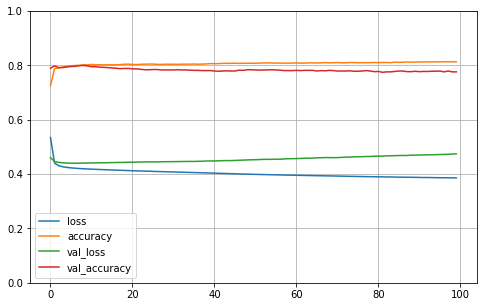

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Terlihat model sedikit overfit terlihat pada bagian loss untuk train semakin bagus namun validation semakin buruk

# 8 - Model Evaluation

In [38]:
model1.evaluate(X_test_final, y_test)

22/22 [==============================] - 0s 901us/step - loss: 0.4252 - accuracy: 0.7983


[0.4251747131347656, 0.7982954382896423]

Pada test set kita melihat bahwa accurcy model ini memilih loss = 0,44 dan accuracy = 0,80. Mari kita cek bagaimana performa model ketika memprediksi data

In [39]:
yPredictedSeq = model1.predict(X_test_final)

22/22 [==============================] - 0s 675us/step


Kita akan melihat bagimana model menghandle kasus dibawah ini:

Karena data kita imbalance kita akan coba fokus untuk melihat bagaimana model menangani costumer yang terklasifikasi meningggalakan provider tersebut namun terprediksi tidak meninggalkan. Untuk itu mari kita berfokus kepada psitive dengan label 1 dimana kita akan cek nilai FN nya apakah kecila atau tidak dan kita akan cek nilai recal pada label 1

In [40]:
y_pred = []
for element in yPredictedSeq:
    if element > 0.35:
        y_pred.append(1)
    else:
        y_pred.append(0)

Berdasarkan referensi kita mengetahui bahwa jika kita menaikkan nilai thresshold maka recall akan semakin kecil untuk itu kita mencoba untuk menurunkan nilai thresholdnya. dimana threshold yang kita pakai adalah 0.35 untuk yang diatas angka tersebut akan terklasfikasi meninggalkan provider.

Text(51.0, 0.5, 'Actual')

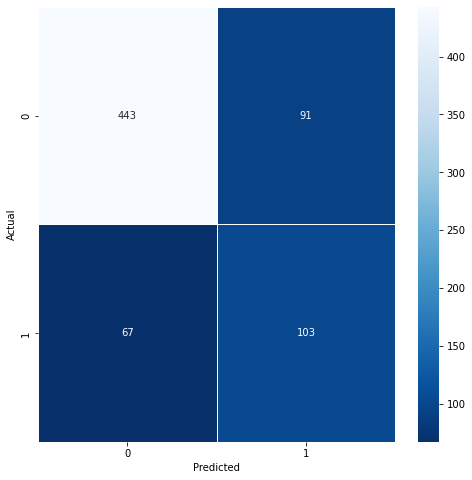

In [41]:
cm = tf.math.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Terlihat hasil yang cukup baik dalam confussion matrix dimana FN nya paling kecil diantara yang lain yaitu 67

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       534
           1       0.53      0.61      0.57       170

    accuracy                           0.78       704
   macro avg       0.70      0.72      0.71       704
weighted avg       0.79      0.78      0.78       704



Terlihat juga dari recal pada label satu yang cukup baik. Dalam hal ini kita dapat menyimpulkan bahwa model cukup baik dalam menangani kasus kita.

# 9 -  Model Saving

In [43]:
# Saving model
model1.save("model.h5")

with open('preprocessing.pkl', 'wb') as f:
    pickle.dump(scaler_encode, f)

# 10 - Inference Model

## Load Model

In [48]:
# Load Model
model = tf.keras.models.load_model('model.h5')

with open('preprocessing.pkl', 'rb') as f:
    preprocessing = pickle.load(f)

In [44]:
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
1,Female,Yes,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
2,Female,No,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No


## Inference

In [49]:
## Split X and y
X_inf = df_inf.drop(['Churn'], axis=1)
y_inf = df_inf['Churn']

## Scale and encode
X_inf = preprocessing.transform(X_inf)
y_inf = le.transform(y_inf)

In [52]:
X_inf = pd.DataFrame(data=X_inf, columns=preprocessing.get_feature_names_out())

# Drop Features
X_inf.drop(drop_features, axis=1, inplace=True)

In [53]:
#predict
y_pred_inf = model.predict(X_inf)

1/1 [==============================] - 0s 73ms/step


In [54]:
y_pred_inf_model = []
for element in y_pred_inf:
    if element > 0.35:
        y_pred_inf_model.append(1)
    else:
        y_pred_inf_model.append(0)

In [55]:
y_pred_inf_model

[0, 0, 0]

In [56]:
y_inf

array([0, 0, 0])

Terlihat model berhasil menangani 3 data baru dengan benar.

# 11 - Pengambilan Kesimpulan

## Hasil EDA :

- Data memiliki 7043 baris dengan 21 column, dimana column bertipe object kecuali SeniorCitizen, tenure, dan MonthlyCharges.

- Pada kolom SeniorCitizen memiliki nilai min 0 dan 1, seperti pada dokumentasi dataset ternya kolom tersebut merupakan kolom categorial

- Kolom tenure merupakan lamanya customer memakai jasa provider tersebut, terlihat rata-rata costumer memakai provider selama 32 bulan, terdapat customer yang nilai nya 0 bulan dalam memakai jasa provider dan terlama yaitu 72 bulan.

- Kolom MonthlyCharges merupakan tagihan bulanan costumer dimana tidak terdifinisi dalam curency apa. Mari kita asumsikan Dollar. Terlihat rata-rata tagihan bulan costumer adalah 64$ dengan tagihan terendah 18$ dan tertinggi 118$.

- Terlihat data yang imbalance pada kolom target kita dimana costumer yang tidak menggunakan provider tersebut lebih sedikit dibanding costumer yang masih bertahan, untuk yang bertahan sebanyak 73,5% dan yang tidak menggunakan lagi ada 26,5%.

- Kolom tenure dan MonthlyCharges berdistribusi normal, sedangkan TotalCharges Right Skew. 

- Tidak Banyak Perbedaan dalam jumlah Gender antar laki-laki dengan perempuan dimana laki-laki hanya sedikit lebih tinggi dibandingkan perempuan jumlahnya. Begitu juga dengan status mereka ,memang masih lebih banyak costumer yang single meskipun berbeda sedikit dengan yang non-single. Mayoritas costumer juga belum memiliki tanggungan .

- Costumer banyak yang memilih bulanan dalam berlangganan provider ini. Sesuai dengan zaman juga pembayatan lewat elctronik juga merupakan metode pembayaran yang paling banyak digunakan costumer. Costumer juga banyak memiliki paperlessbilling .

- Cukup unik terdapat 9% pelanggan yang tidak mengambil layanan telepon, diantara 90% costumer yang mengambil layanan telepon terdapat 42% orang yang mengambil layanan multiplelines. Terdapat 21% costumer yang tidak mengambil layanan internet, dan sekitar 78% costumer yang mengambil layanan internet hanya 28% costumer yang memakai security dalam berinternet, mungkin maasih lemahnya kesadaran costumer betapa berbahayanya internet. Terlihat memang jika kita lihat dari semua layanan yang ada masih banyak costumer yang memilih untuk tidak mengambil layanan tertentu. Hal ini mungkin bisa menjadi bahan pertimbangan untuk menarik minat konsumen namun bisa juga memang hal ini merupakan strategi penawaran banyak layanan sesuai kebutuhan consumer.

- Memang sedikit agak tidak terlihat namun jika dilihat lebih mendetail costumer yang bertahan cenderung mempunyai lama penggunaan yang sedikit dibanding costumer yang sudah tidak memakai provider tersebut.

- Terlihat jumlah pria dan wanita yang masih memakai provider ini sama, costumer yang non-single banyak yang berhenti berlangganan. Mungkinkah disebabkan oleh tangungan meraka ? . Setelah kita lihat ternyata costumer yang banyak berhenti berlangganan adalah costumer yang tidak memiliki tanggungan.

- Dalam hal contract cukup menarik bahwa banyak costumer yang memilih tidak berlangganan lagi padahal mereka sudah berlangganan tahunan .

## Hasil Model:

- Melakukan Modeling ANN pada data costumer dari sebuah provider dengan menggunakan Sequential API berikut dibawah ini achitecturenya:
    
    NB : proses arcitecture model sudah di arrange berualang kali dan menemukan bahwa architecture ini yang mungkin paling baik

    Model architecture diatas dibuat dengan sequential API dimana terdapa :

    - 1 input layer dengan neuron 32, lalu mendefinisikan weight initializtionnya yaitu HeNormal , kita mengambil referensi dari dalam kode id bahwa setiap inilization pada umumnya punya pasangan activation functionnya oleh karena itu kita menggunakan relu dimana activation ini berpasang dengan He.

    - 2 hidden layer dengan masing-masing neuron yaitu 16 dan 8 dan juga tetap menggunakan activation functionya relu

    - 1 output layer dengan neuron 1 dimana kasus kita adalah menangani binary classification, dan untuk menangani itu kita memakan activation sigmoid.

    Pada Compiling model kita akan set optimizer, loss dan metricnya, dimana:

    - optimizer kita menggunakan adam karena dia optimizer yang bagus untuk menghasilkan convergen quality dan dia tidak terlalu banyak membutuhkan banyak tunning terhadap learning ratenya.
    - loss nya kita memakai BinaryCrossentropy karena kita menangani binary clasification 
    - dan untuk matricnya kita pakai accuracy

-----------------------------------------------------------------------------------
- Hasil Visualisasi pada training train dan validation set menunjukkan bahwa model sedikit overfit
Pada test set kita melihat bahwa accurcy model ini memilih loss = 0,44 dan accuracy = 0,80. Mari kita cek bagaimana performa model ketika memprediksi data

- Setelah model dilakukan prediksi terhadap dataset dengan objectif yang ditentukan adlaah model mampu menangani kasus dimana costumer yang sebenernya sudah tidak memakai provider namun malah diprediksi masih memakai.

Terlihat hasil yang cukup baik dalam confussion matrix dimana FN nya paling kecil diantara yang lain yaitu 67 dan Terlihat juga dari recal pada label satu yang cukup baik.

## Referensi :
- https://www.kaggle.com/code/sardiirfansyah/tensorflow-input-pipeline-prefetch-tf-data
- Kode.Id
- https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-accuracy-precision-recall?hl=id